In [1]:
#Stock Market (S&P 500) Sigma (standard deviation) Analysis
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd Desktop/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1658759980984.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Volume,Open,High,Low
0,07/22/2022,3961.63,--,3998.43,4012.44,3938.86
1,07/21/2022,3998.95,--,3955.47,3999.29,3927.64
2,07/20/2022,3959.90,--,3935.32,3974.13,3922.03
3,07/19/2022,3936.69,--,3860.73,3939.81,3860.73
4,07/18/2022,3830.85,--,3883.79,3902.44,3818.63
...,...,...,...,...,...,...
2542,07/31/2012,1379.32,--,1385.27,1387.16,1379.17
2543,07/30/2012,1385.30,--,1385.94,1391.74,1381.37
2544,07/27/2012,1385.97,--,1360.05,1389.19,1360.05
2545,07/26/2012,1360.02,--,1338.17,1363.13,1338.17


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2547.000000,2547.000000,2547.000000,2547.000000
mean,2622.234868,2599.222320,2612.706863,2584.521441
std,873.658655,916.612481,922.588015,909.726334
min,1337.890000,0.000000,0.000000,0.000000
25%,1987.355000,1980.950000,1988.900000,1972.570000
50%,2431.770000,2431.920000,2441.400000,2419.970000
75%,3009.310000,3012.170000,3021.230000,2997.925000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2515.000000,2515.000000,2515.000000,2515.000000
mean,2632.721113,2632.293936,2645.950052,2617.406008
std,873.731863,873.947363,879.777317,867.196526
min,1337.890000,1338.170000,1343.980000,1331.500000
25%,1993.820000,1992.815000,2001.480000,1982.605000
50%,2440.350000,2442.380000,2450.420000,2431.110000
75%,3023.245000,3021.530000,3047.385000,3001.510000
max,4796.560000,4804.510000,4818.620000,4780.040000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2515 non-null   object 
 1   Close/Last  2515 non-null   float64
 2   Volume      2515 non-null   object 
 3   Open        2515 non-null   float64
 4   High        2515 non-null   float64
 5   Low         2515 non-null   float64
dtypes: float64(4), object(2)
memory usage: 137.5+ KB


In [5]:
df.shape

(2515, 6)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Volume        False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

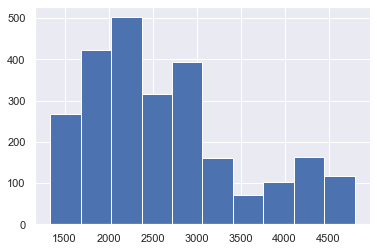

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

3961.63

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

2632.721113320089

In [10]:
close_sd = df['Close/Last'].std()
close_sd

873.7318625296185

In [11]:
sigma1 = close_mean + close_sd
sigma1

3506.4529758497074

In [12]:
sigma2 = close_mean + (2 * close_sd)
sigma2

4380.184838379326

In [13]:
sigma3 = close_mean + (3 * close_sd)
sigma3

5253.916700908945

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2515 entries, 0 to 2546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2515 non-null   datetime64[ns]
 1   Close/Last  2515 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 58.9 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2012-07-25 to 2022-07-22')

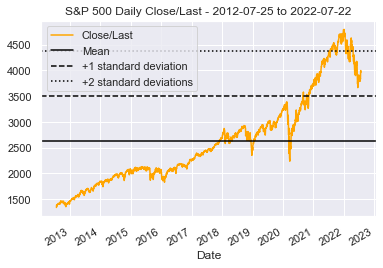

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2012-07-25 to 2022-07-22')

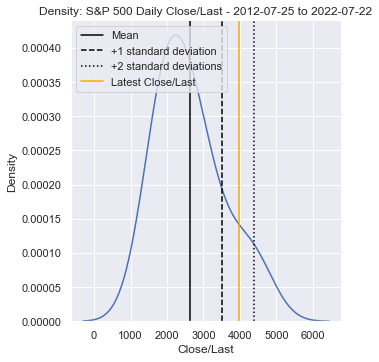

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

1.5209573367651597